In [11]:
# Welcome to Quantopian Challenge #0
# Instructions:


import json
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

YOUR_EMAIL = "ch.jamal.abd@gmail.com" # <<<<< Be sure to set your email address.


###############################################################################
# Challenge Description                                                       #
# ---------------------                                                       #
# Generate a series with 1000 daily steps that has a Sharpe of 2+/-0.1.       #
#                                                                             #
# vvvvvvvvvvv  IMPLEMENT THIS METHOD TO SOLVE THE CHALLENGE!  vvvvvvvvvvvvvvv #
def challenge_0_solution(step_count: int, sharpe_target: float) -> np.ndarray:
  """
  parameters:
  - `step_count` -- number of daily steps for your series
  - `sharpe_target` -- desired sharpe ratio for your series

  sharpe ratio formula = S =  (RendementPortfolio - RendementRiskFree) / StandardDeviation
  ==> We have to generate a serie so S = (2 + 0)/-0.1
  ==> We have to adjust the mean of the serie and the standard deviation
  ==>

  returns:
  a series with `step_count` floats, that has a sharpe of `sharpe_target`
  """
  series = np.random.randn(step_count)

  # Choose an arbitrary target standard deviation
  target_std_dev = 0.15

  # Calculate target mean return based on desired Sharpe ratio
  target_mean = sharpe_target * target_std_dev

  # Scale series to have the target standard deviation
  series = series * target_std_dev / np.std(series)

  # Adjust the mean to achieve the target mean
  series = series + (target_mean - np.mean(series))

  # Validate the result (optional, to check your work)
  calculated_sharpe = (np.mean(series) - 0) / np.std(series)
  print(f"Calculated Sharpe Ratio: {calculated_sharpe}")  # Should be close to sharpe_target

  return series

In [12]:
series = challenge_0_solution(1000, 2.0)

Calculated Sharpe Ratio: 2.0000000000000004


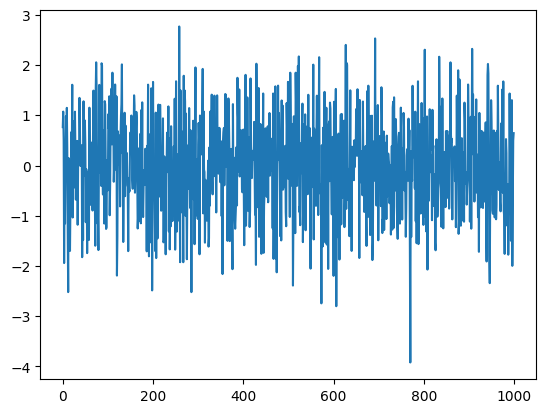

Calculated Sharpe Ratio: 2.0000000000000004


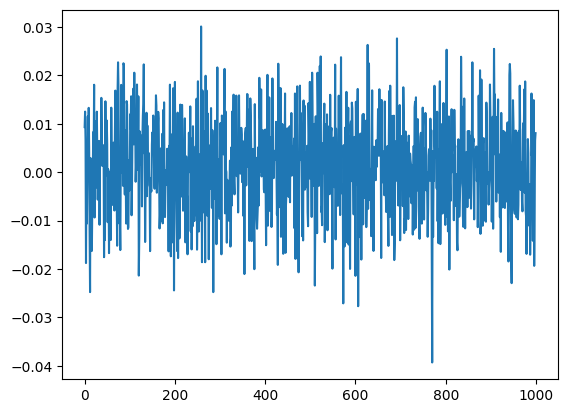

In [14]:
# Welcome to Quantopian Challenge #0
# Instructions:


import json
import re
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

YOUR_EMAIL = "ch.jamal.abd@gmail.com" # <<<<< Be sure to set your email address.


###############################################################################
# Challenge Description                                                       #
# ---------------------                                                       #
# Generate a series with 1000 daily steps that has a Sharpe of 2+/-0.1.       #
#                                                                             #
# vvvvvvvvvvv  IMPLEMENT THIS METHOD TO SOLVE THE CHALLENGE!  vvvvvvvvvvvvvvv #
def challenge_0_solution(step_count: int, sharpe_target: float) -> np.ndarray:
  """
  parameters:
  - `step_count` -- number of daily steps for your series
  - `sharpe_target` -- desired sharpe ratio for your series

  sharpe ratio formula = S =  (RendementPortfolio - RendementRiskFree) / StandardDeviation
  ==> We have to generate a serie so S = (2 + 0)/-0.1
  ==> We have to adjust the mean of the serie and the standard deviation
  ==>

  returns:
  a series with `step_count` floats, that has a sharpe of `sharpe_target`
  """
  trading_days = 256

  # Generate initial random returns
  series = np.random.randn(step_count)

  target_std_dev = 0.01  # 1% standard deviation

  # Calculate the scaling factor to achieve the target annualized Sharpe ratio
  scaling_factor = (sharpe_target / np.sqrt(trading_days))

  # Calculate target daily mean return based on desired annualized Sharpe ratio
  daily_mean_return = target_std_dev * scaling_factor

  # Adjust the series to the target daily standard deviation
  series *= target_std_dev / np.std(series)

  # Adjust the mean to achieve the target daily mean return
  series += daily_mean_return - np.mean(series)

  calculated_sharpe = (np.mean(series) * trading_days) / (np.std(series) * np.sqrt(trading_days))
  print(f"Calculated Sharpe Ratio: {calculated_sharpe}")

  return series

series = challenge_0_solution(1000, 2.0)

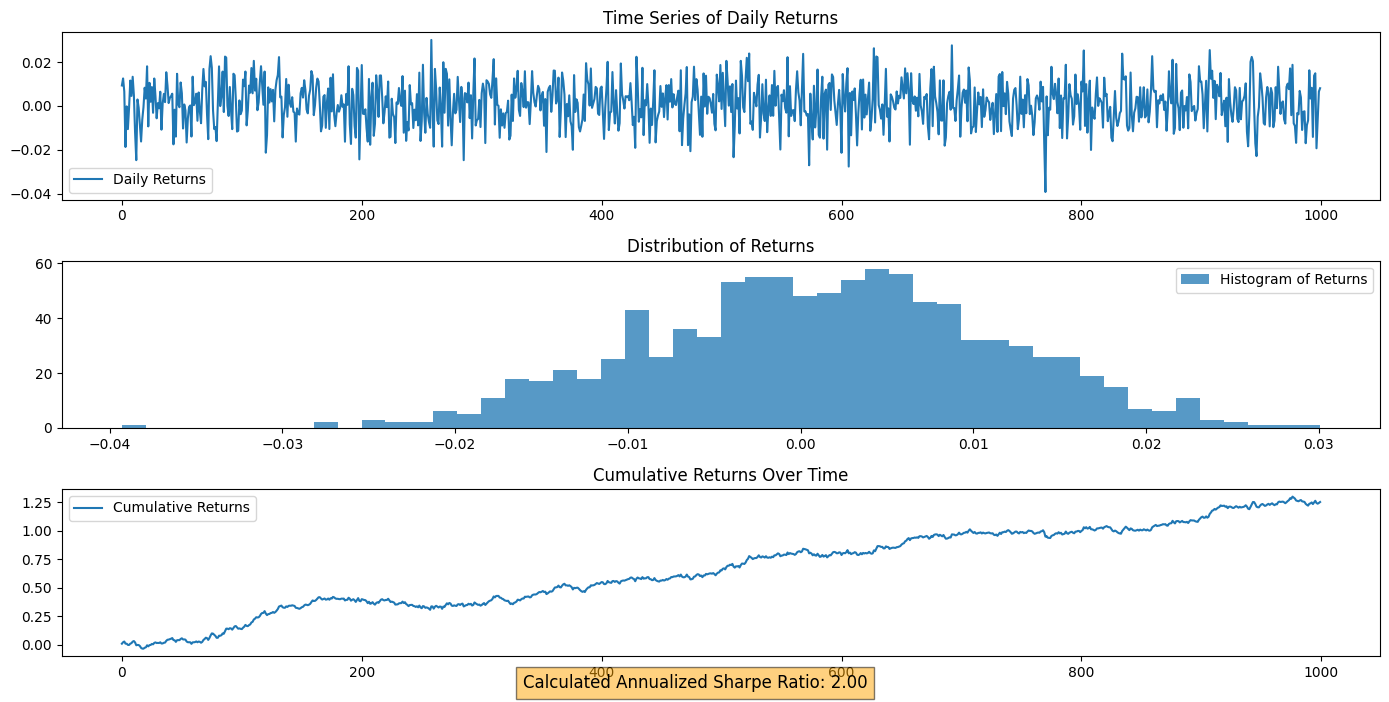

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_series(series, calculated_sharpe):
    # Time Series Plot
    plt.figure(figsize=(14, 7))
    plt.subplot(3, 1, 1)
    plt.plot(series, label='Daily Returns')
    plt.title('Time Series of Daily Returns')
    plt.legend()

    # Histogram of Returns
    plt.subplot(3, 1, 2)
    plt.hist(series, bins=50, alpha=0.75, label='Histogram of Returns')
    plt.title('Distribution of Returns')
    plt.legend()

    # Cumulative Returns Plot
    cumulative_returns = np.cumsum(series)
    plt.subplot(3, 1, 3)
    plt.plot(cumulative_returns, label='Cumulative Returns')
    plt.title('Cumulative Returns Over Time')
    plt.legend()

    # Display all plots with Sharpe Ratio Annotation
    plt.figtext(0.5, 0.01, f"Calculated Annualized Sharpe Ratio: {calculated_sharpe:.2f}", ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
    plt.tight_layout()
    plt.show()

# Assuming 'series' is your daily returns numpy array and 'calculated_sharpe' is the Sharpe ratio you calculated
plot_series(series, 2)
